In [13]:
from pandas import pandas as pd
from tf_keras.preprocessing.text import Tokenizer
import pickle

data_train = pd.read_json("dataset-train.json")
X_train = data_train["tokens"]
Y_train = data_train["type"]

with open("tokenizer.pickle", 'rb') as handle:
        tokenizer = pickle.load(handle)
X_train = tokenizer.texts_to_sequences(X_train)

vocab_size = 5380

최대 길이 : 820
평균 길이 : 57.532572057508425


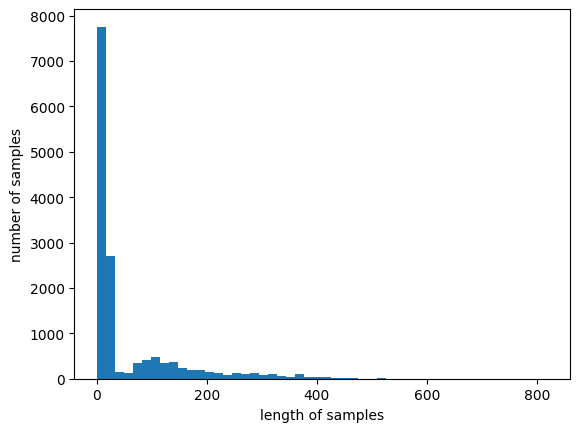

In [14]:
from matplotlib import pyplot as plt

print('최대 길이 :',max(len(review) for review in X_train))
print('평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()


In [15]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [16]:
max_len = 120
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 120 이하인 샘플의 비율: 83.20836486207608


In [17]:
from tf_keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train, maxlen=max_len)

In [18]:
from tf_keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Embedding, Dropout, MaxPooling1D
from tf_keras.models import Sequential
from tf_keras.callbacks import EarlyStopping, ModelCheckpoint

# single layer
# 32,32,5   0.979 0.979
# 32,64,5   0.978 0.975
# 32,64,10  0.986 0.974
# 32,64,20  0.986 0.971
# 32,128,10 0.987 0.970
# 32,128,20 0.989 0.975
# 32,128,30 0.986 0.976
# 32,32,10  0.984 0.971

embedding_dim = 16
num_filters = 128
kernel_size = 20
dropout_ratio = 0.3

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(dropout_ratio))
model.add(Conv1D(num_filters, kernel_size, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(dropout_ratio))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('cnn.keras', monitor = 'val_acc', mode='max', verbose=1, save_best_only=True)

history = model.fit(X_train, Y_train, epochs=10, batch_size=64, validation_split=0.2, callbacks=[es, mc])


Epoch 1/10
182/182 [==============================] - ETA: 0s - loss: 0.3409 - acc: 0.8393
Epoch 1: val_acc improved from -inf to 0.97696, saving model to cnn.keras
182/182 [==============================] - 16s 73ms/step - loss: 0.3409 - acc: 0.8393 - val_loss: 0.0770 - val_acc: 0.9770
Epoch 2/10
182/182 [==============================] - ETA: 0s - loss: 0.0653 - acc: 0.9779
Epoch 2: val_acc improved from 0.97696 to 0.98349, saving model to cnn.keras
182/182 [==============================] - 13s 71ms/step - loss: 0.0653 - acc: 0.9779 - val_loss: 0.0534 - val_acc: 0.9835
Epoch 3/10
182/182 [==============================] - ETA: 0s - loss: 0.0402 - acc: 0.9860
Epoch 3: val_acc did not improve from 0.98349
182/182 [==============================] - 17s 94ms/step - loss: 0.0402 - acc: 0.9860 - val_loss: 0.0505 - val_acc: 0.9828
Epoch 4/10
182/182 [==============================] - ETA: 0s - loss: 0.0262 - acc: 0.9915
Epoch 4: val_acc improved from 0.98349 to 0.98693, saving model to cnn